In [9]:
%matplotlib inline
import pandas as pd
import numpy as np

%run ../flaskr/queries.py

Query took  38
59528


/Users/dirkhovy/anaconda/envs/py3.4/lib/python3.4/site-packages/pandas/core/common.py:516: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


Get totals plus results for a specific query. The specific query needs to be normalized. 

In [25]:
country_code = 'dk'
totals = simple_query_totals()
print(totals['num_docs'].sum())
country_mask = totals.country_code == country_code
totals = totals[country_mask]

specific_query = simple_query_totals({"query": "body_text_ws:flot", 
                                      "filter": ["country_s:dk", "langid_s:da"]})
specific_query = specific_query[specific_query.country_code == 'dk']


Query took  45
2932019
Query took  2


/Users/dirkhovy/anaconda/envs/py3.4/lib/python3.4/site-packages/pandas/core/common.py:516: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


### Gender distribution

In [26]:
gender_totals = totals.groupby('gender').num_docs.sum()
gender_query = specific_query.groupby('gender').num_docs.sum()
gender_query

gender
F    2146
M    2015
Name: num_docs, dtype: int64

Percentage of male and female documents that contain the term. The two bars do not sum to 1, and in fact can be over 1 over when added.

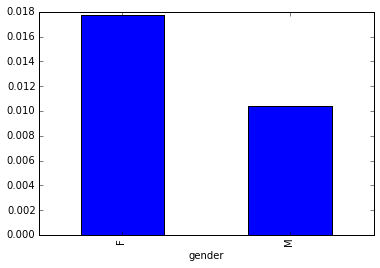

In [27]:
(gender_query / gender_totals).plot(kind='bar')

If we pretend that the dataset is balanced, that is the number of females and males are equal, we can present a figure that shows how the found documents are distributed. The phrasing could be something like "adjusted for sample size".

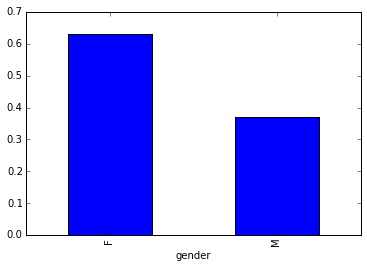

In [28]:
abs_percentages = gender_query / gender_totals
renormalizer = 1.0 / abs_percentages.sum()
(abs_percentages * renormalizer).plot(kind='bar')

## Age distribution

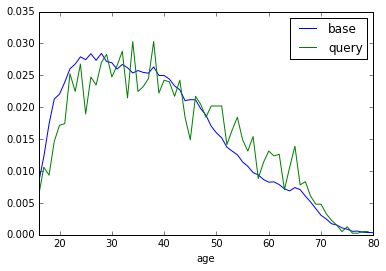

In [30]:
def sort_and_filter_age(age_df):
    age_df.index = age_df.index.astype(int)
    ages_index = [age for age in sorted(age_df.index)
                  if age >= 16
                  if age <= 80]
    return age_df.ix[ages_index]

age_totals = totals.groupby('age').num_docs.sum()
age_totals = sort_and_filter_age(age_totals)
age_totals_norm = age_totals / age_totals.sum()

age_specific_query = specific_query.groupby('age').num_docs.sum()
age_specific_query = sort_and_filter_age(age_specific_query)
age_specific_query_norm = age_specific_query / age_specific_query.sum()

compare_df = pd.DataFrame({'base': age_totals_norm, 'query': age_specific_query_norm})

compare_df.plot()
# age_specific_query

Less jagged graphs with rolling mean.

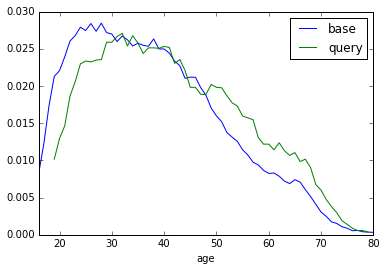

In [31]:
compare_df = pd.DataFrame({'base': age_totals_norm, 
                           'query': pd.rolling_mean(age_specific_query_norm, 4)})

compare_df.plot()

## Age and gender

A slight variation on plotting by age

In [32]:
def prepare_age_and_gender(df):
    age_gender_df = df.groupby(['age', 'gender']).num_docs.sum()
    age_gender_df = age_gender_df.unstack('gender')
    age_gender_df = sort_and_filter_age(age_gender_df)
    
    # Normalize
    return (age_gender_df / age_gender_df.sum())    

age_and_gender_totals = prepare_age_and_gender(totals)
age_and_gender_specific_query = prepare_age_and_gender(specific_query)

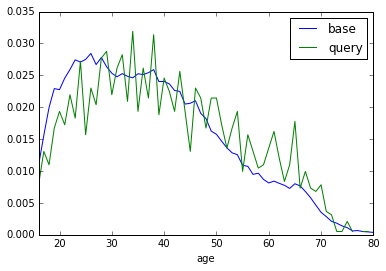

In [33]:
compare_male_df = pd.DataFrame({'base': age_and_gender_totals['M'],
                                'query': age_and_gender_specific_query['M']})

compare_male_df.plot()

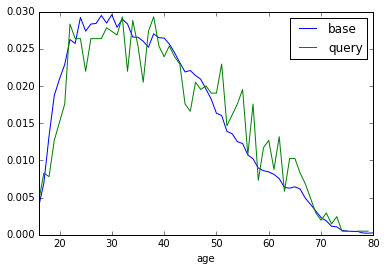

In [34]:
compare_female_df = pd.DataFrame({'base': age_and_gender_totals['F'],
                                'query': age_and_gender_specific_query['F']})

compare_female_df.plot()

In [36]:
from bokeh.plotting import figure, output_file, show, line
for i in range(0, 16):
    age_specific_query_norm.ix[i] = 0
age_specific_query_norm.sort()

xs = list(map(str, age_specific_query_norm.index.tolist()))
p = figure(plot_width=400, plot_height=400)
p.line(pd.rolling_mean(age_specific_query_norm, 4))

output_file('line.html')
show(line)
age_specific_query_norm

ImportError: cannot import name 'line'

## Region

In [31]:
nuts_total = totals.groupby('nuts_3').num_docs.sum()
nuts_query = specific_query.groupby('nuts_3').num_docs.sum()
nuts_total = nuts_query.sum()
nuts_query_norm = nuts_query / nuts_total
nuts_total

4161

In [42]:
xs = list(map(str, age_specific_query_norm.index.tolist()))
type(xs)

list

In [55]:
age_specific_query_norm.ix[0] = 0

In [56]:
age_specific_query_norm

age
16    0.006061
17    0.010606
18    0.009343
19    0.014646
20    0.017172
21    0.017424
22    0.025253
23    0.022475
24    0.026768
25    0.018939
26    0.024747
27    0.023485
28    0.027020
29    0.028283
30    0.024747
31    0.026515
32    0.028788
33    0.021465
34    0.030303
35    0.022475
36    0.023232
37    0.024495
38    0.030303
39    0.022222
40    0.024242
41    0.023990
42    0.021717
43    0.024242
44    0.018434
45    0.014899
        ...   
51    0.020202
52    0.014141
53    0.016414
54    0.018434
55    0.014899
56    0.013131
57    0.015404
58    0.008838
59    0.011364
60    0.013131
61    0.012374
62    0.012626
63    0.007071
64    0.010606
65    0.013889
66    0.007828
67    0.008333
68    0.006061
69    0.004798
70    0.004798
71    0.003283
72    0.002273
73    0.001515
74    0.000505
75    0.001263
76    0.000253
77    0.000253
78    0.000505
79    0.000505
0     0.000000
Name: num_docs, dtype: float64